In [65]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [66]:
dataset=pd.read_csv("Dataset.csv")

In [67]:
dataset.head()

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2


In [68]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [69]:
dataset['Date']= le.fit_transform(dataset['Date'])

In [70]:
dataset.tail(10)

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
1429,Friday,9,5,135,18,25,4
1430,Friday,9,5,136,31,8,2
1431,Friday,9,5,137,13,11,4
1432,Friday,9,5,138,34,15,1
1433,Friday,9,5,139,5,43,4
1434,Friday,9,5,140,47,38,1
1435,Friday,9,5,141,15,8,4
1436,Friday,9,5,142,26,38,1
1437,Friday,9,5,143,16,34,3
1438,Friday,9,5,144,16,17,1


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   int32 
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 73.2+ KB


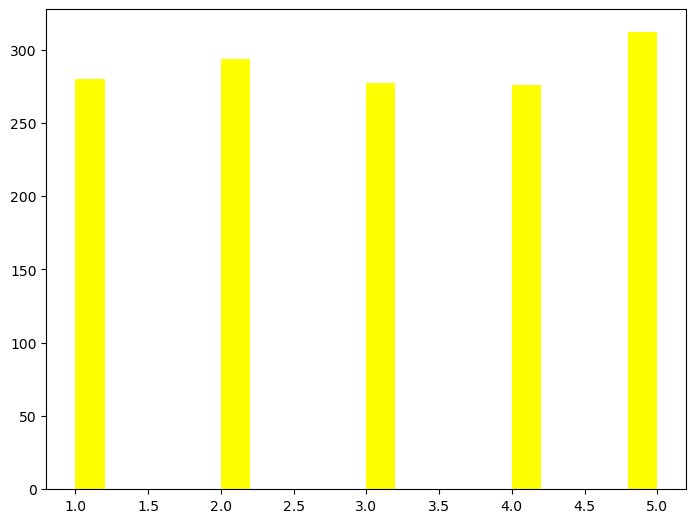

In [72]:

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(dataset['Traffic'], 20, color='yellow')
plt.show()

In [73]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 6:7].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train)

C:\Users\91700\AppData\Local\Temp\ipykernel_18408\1592691624.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=300, random_state=0)

In [77]:
y_pred = regressor.predict(X_test)

In [78]:

if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

y_pred

array([3., 3., 2., 3., 2., 2., 3., 2., 3., 2., 3., 3., 2., 2., 3., 2., 2.,
       3., 3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 2., 2., 2., 3., 3., 2.,
       3., 2., 3., 4., 2., 3., 2., 3., 2., 3., 3., 3., 3., 2., 2., 3., 4.,
       3., 3., 2., 3., 3., 3., 2., 2., 2., 3., 2., 2., 1., 3., 3., 3., 3.,
       2., 3., 2., 3., 3., 3., 2., 3., 3., 2., 2., 3., 2., 2., 3., 2., 3.,
       3., 3., 3., 3., 2., 3., 2., 2., 3., 2., 3., 2., 3., 3., 3., 2., 2.,
       2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 3., 3., 2., 3.,
       2., 3., 3., 2., 2., 3., 3., 2., 3., 4., 1., 2., 3., 3., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 3., 2., 3., 3., 3., 2., 2., 2., 3.,
       2., 3., 2., 3., 2., 3., 3., 2., 2., 3., 2., 2., 2., 3., 2., 2., 3.,
       3., 3., 2., 3., 3., 2., 2., 2., 2., 2., 2., 3., 3., 3., 2., 3., 2.,
       2., 2., 2., 1., 2., 3., 2., 3., 2., 2., 2., 2., 4., 3., 3., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 2., 3., 3., 3., 2., 3., 3.,
       3., 2., 3., 3., 2.

In [79]:
y_pred= np.round(y_pred).astype(int)
print(y_pred)

[3 3 2 3 2 2 3 2 3 2 3 3 2 2 3 2 2 3 3 2 3 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 3
 4 2 3 2 3 2 3 3 3 3 2 2 3 4 3 3 2 3 3 3 2 2 2 3 2 2 1 3 3 3 3 2 3 2 3 3 3
 2 3 3 2 2 3 2 2 3 2 3 3 3 3 3 2 3 2 2 3 2 3 2 3 3 3 2 2 2 2 3 2 3 2 2 3 2
 3 2 2 3 3 3 2 3 2 3 3 2 2 3 3 2 3 4 1 2 3 3 2 3 3 3 3 3 3 3 3 2 3 3 2 3 3
 3 2 2 2 3 2 3 2 3 2 3 3 2 2 3 2 2 2 3 2 2 3 3 3 2 3 3 2 2 2 2 2 2 3 3 3 2
 3 2 2 2 2 1 2 3 2 3 2 2 2 2 4 3 3 2 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 2 3 3 3
 2 3 3 2 2 3 2 2 2 3 3 3 2 2 3 2 1 2 2 3 2 3 2 3 3 2 2 2 2 2 3 2 2 3 2 3 3
 1 2 2 3 3 3 2 2 3 3 2 3 2 3 2 3 2 3 2 2 4 2 3 2 2 2 3 2 3]


In [80]:
y_test_flat = np.array(y_test).flatten()
print(y_test_flat)

[1 3 5 5 2 3 5 5 3 5 2 5 4 5 4 1 4 3 5 3 5 4 5 5 1 1 1 1 5 3 4 2 1 1 3 5 2
 5 4 4 2 4 1 1 2 2 2 1 3 2 2 4 2 5 4 3 3 2 3 2 3 4 5 4 5 2 5 2 2 3 2 2 3 3
 3 4 5 2 4 2 5 2 2 1 2 5 3 5 1 4 4 2 3 5 5 3 3 4 1 4 1 2 5 1 3 3 5 1 5 1 5
 5 1 2 4 1 2 1 2 4 3 2 2 2 5 4 4 3 3 5 4 1 3 1 3 4 2 1 2 5 5 4 2 4 5 5 1 5
 2 4 2 4 3 1 2 3 1 5 2 5 4 3 1 5 5 5 1 5 2 2 5 2 2 1 1 4 5 1 2 1 4 4 5 5 2
 1 3 2 4 5 3 1 5 2 3 2 5 4 4 2 2 5 2 5 1 5 3 5 1 2 2 1 3 4 2 5 3 1 2 2 3 2
 4 3 5 2 1 1 4 4 4 4 4 2 1 1 5 1 3 5 3 3 3 2 2 3 4 4 5 3 1 3 5 5 5 1 4 1 4
 2 4 3 4 4 5 1 2 4 1 2 3 1 5 1 2 3 2 4 1 3 4 3 3 1 4 3 4 1]


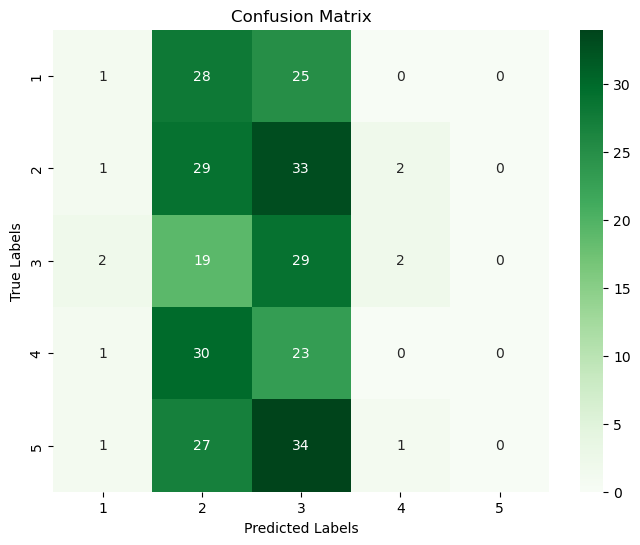

In [81]:
cm = confusion_matrix(y_test_flat, y_pred)
labels = ['1', '2', '3', '4', '5']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [82]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 

Error =  13.42 %


In [83]:
a=100-df1
print("Accuracy= ",a,"%")

Accuracy=  86.58 %


In [84]:
print("Error = ",df1,"%")
print("Accuracy= ",a,"%")

Error =  13.42 %
Accuracy=  86.58 %


In [85]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [86]:
y_pred = regressor.predict(X_test)
y_pred

array([2.48568787, 3.83075078, 3.2936518 , 3.1673047 , 2.92523973,
       2.31572795, 2.36996983, 2.19128844, 3.66497598, 2.56215864,
       3.09770455, 3.37561416, 2.86955855, 2.70819912, 2.51284476,
       2.60066084, 2.4309671 , 2.37138504, 3.18637153, 2.83358309,
       3.60021418, 2.48652871, 3.03685709, 2.39762196, 2.497879  ,
       3.11026378, 2.99161215, 3.69680818, 3.09097039, 2.62917555,
       2.84167464, 3.26385761, 2.957667  , 3.15259094, 3.1129895 ,
       2.65382723, 2.64573348, 4.17701652, 3.1214746 , 2.59892333,
       2.54551056, 3.67757031, 2.76428867, 3.82274378, 3.06953225,
       2.93527699, 2.77584091, 2.67888664, 2.3393692 , 3.94660356,
       2.98060755, 3.72745618, 4.06289067, 3.18461613, 2.79760641,
       3.16032156, 2.40107766, 3.05992469, 2.50326614, 3.14948545,
       2.0258538 , 2.39031143, 2.5313014 , 2.06376862, 3.25822173,
       3.8331732 , 2.91792523, 4.16926464, 2.99944268, 2.72893788,
       2.7935679 , 3.48603414, 3.09625424, 3.2274822 , 3.18776

In [87]:

if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

y_pred

array([2., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 3., 2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 2., 3.,
       3., 2., 2., 4., 3., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 3., 2.,
       3., 4., 3., 2., 3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 2., 4.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 3., 1., 2., 3., 3., 2.,
       2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2., 3., 3., 3., 2., 3.,
       2., 3., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 3., 3., 2., 3., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 1., 4., 3.,
       3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3.,
       3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 3., 1., 2., 2., 3.,
       2., 3., 2., 3., 2., 3., 3., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 2., 2., 2.

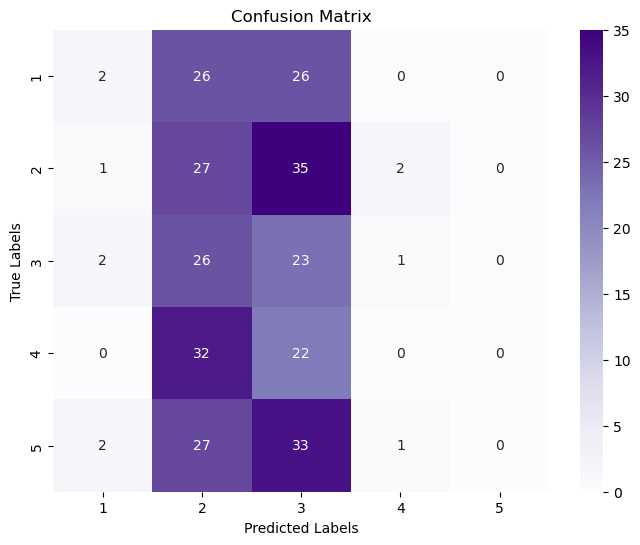

In [88]:
cm = confusion_matrix(y_test_flat, y_pred)
labels = ['1', '2', '3', '4', '5']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [89]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 

Error =  12.16 %


In [90]:
a=100-df1
print("Accuracy= ",a,"%")

Accuracy=  87.84 %


In [91]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.04      0.07        54
           2       0.20      0.42      0.27        65
           3       0.17      0.44      0.24        52
           4       0.00      0.00      0.00        54
           5       1.00      0.00      0.00        63

    accuracy                           0.18       288
   macro avg       0.33      0.18      0.11       288
weighted avg       0.35      0.18      0.12       288

